<a href="https://colab.research.google.com/github/DeusExMachina1993/Deep-Computer-Vision/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1:**Multi-layer NN**

Q.Use MNIST dataset for multi-class classification. Change the following parameters and report recognition accuracy and time on train, test, and validation sets.

a- number of hidden layers
b- number of neurons per layer
c- optimization algorithm
d- loss function
e- number of epochs
f- batch size


**Classifying Handwritten Digits with Neural Networks**

![img](https://www.tensorflow.org/images/MNIST.png)

The process will be broken down into the following steps:

1.   Load and visualize the data
2.   Define a neural network
3.   Train the model
4.   Evaluate the performance 














Load necessary Library


In [1]:
import numpy as np
import os
import tempfile

import keras
from keras import backend as K
from keras import layers
from keras.datasets import mnist

import tensorflow as tf

Using TensorFlow backend.


1.Load and visualize the data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


 flatten the 28x28 pixels into a vector

In [0]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [0]:
# normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# one hot encode target values
y_train = keras.utils.np_utils.to_categorical(y_train,10)
y_test = keras.utils.np_utils.to_categorical(y_test,10)

2.Define a neural network

Expriement 1:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=64
```


```
c- optimization algorithm=SGD
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=50
```


```
f- batch size=32
```




```
g- activation function=Relu
```













In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
def build_model():
  model =Sequential([
    layers.Dense(units=64,input_shape=(784,), activation=tf.nn.relu),
    layers.Dense(units=10, activation=tf.nn.softmax),
    
  ])
  return model

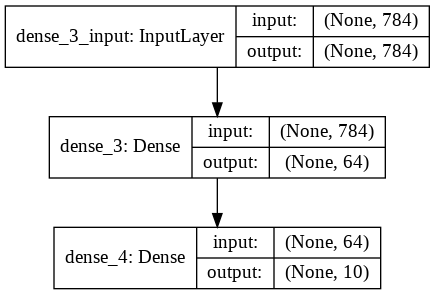

In [9]:
from keras.utils.vis_utils import plot_model
expriment1=build_model();
plot_model(expriment1, to_file='model_plot.png',expand_nested=True,show_shapes=True)



3.Train the model

In [11]:
# train model
expriment1.compile(keras.optimizers.SGD(lr=0.01,momentum=0,decay=0,nesterov=False),loss='categorical_crossentropy', metrics=['accuracy'])
expriment1_train = expriment1.fit(
    x_train, y_train,
    batch_size=32, epochs=50,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 56us/step - loss: 0.2195 - acc: 0.9373 - val_loss: 0.1792 - val_acc: 0.9490
Epoch 2/50
54000/54000 [==============================] - 3s 53us/step - loss: 0.2073 - acc: 0.9403 - val_loss: 0.1701 - val_acc: 0.9550
Epoch 3/50
54000/54000 [==============================] - 3s 54us/step - loss: 0.1971 - acc: 0.9437 - val_loss: 0.1643 - val_acc: 0.9545
Epoch 4/50
54000/54000 [==============================] - 3s 54us/step - loss: 0.1875 - acc: 0.9464 - val_loss: 0.1566 - val_acc: 0.9575
Epoch 5/50
54000/54000 [==============================] - 3s 54us/step - loss: 0.1790 - acc: 0.9483 - val_loss: 0.1505 - val_acc: 0.9592
Epoch 6/50
54000/54000 [==============================] - 3s 54us/step - loss: 0.1712 - acc: 0.9514 - val_loss: 0.1477 - val_acc: 0.9590
Epoch 7/50
54000/54000 [==============================] - 3s 55us/step - loss: 0.1645 - acc: 0.9532 - val_loss: 0.1410 - val_acc:

4.Evaluate the performance



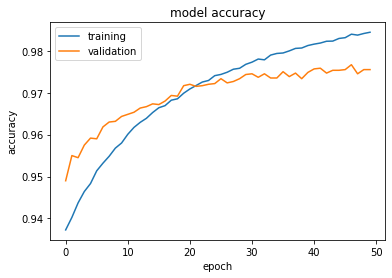

In [12]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment1.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment1_train.history['acc'])
plot.plot(expriment1_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

Expriement 2:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=64
```


```
c- optimization algorithm=rmsprop
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=50
```


```
f- batch size=32
```




```
g- activation function=Relu
```













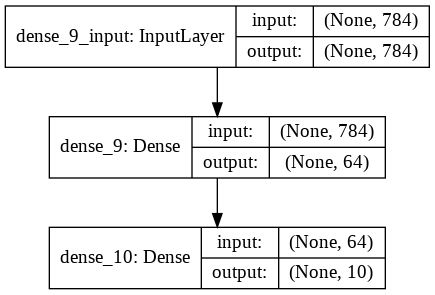

In [20]:
from keras.utils.vis_utils import plot_model
expriment2=build_model();
plot_model(expriment2, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [19]:
expriment2.compile(keras.optimizers.rmsprop(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
expriment2_train = expriment2.fit(
    x_train, y_train,
    batch_size=32, epochs=50,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.3151 - acc: 0.9200 - val_loss: 0.2056 - val_acc: 0.9552
Epoch 2/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.2312 - acc: 0.9553 - val_loss: 0.1973 - val_acc: 0.9637
Epoch 3/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.2170 - acc: 0.9627 - val_loss: 0.2571 - val_acc: 0.9637
Epoch 4/50
54000/54000 [==============================] - 4s 66us/step - loss: 0.2107 - acc: 0.9673 - val_loss: 0.2300 - val_acc: 0.9707
Epoch 5/50
54000/54000 [==============================] - 3s 63us/step - loss: 0.2164 - acc: 0.9702 - val_loss: 0.2895 - val_acc: 0.9672
Epoch 6/50
54000/54000 [==============================] - 3s 61us/step - loss: 0.2248 - acc: 0.9725 - val_loss: 0.2789 - val_acc: 0.9705
Epoch 7/50
54000/54000 [==============================] - 3s 61us/step - loss: 0.2155 - acc: 0.9739 - val_loss: 0.3017 - val_acc:

In [15]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment2.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment2_train.history['acc'])
plot.plot(expriment2_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

NameError: ignored

Expriement 3:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=64
```


```
c- optimization algorithm=adam
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=50
```


```
f- batch size=32
```




```
g- activation function=Relu
```













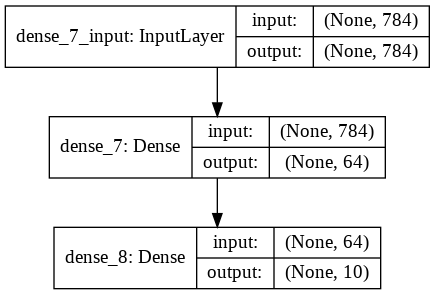

In [16]:
from keras.utils.vis_utils import plot_model
expriment3=build_model();
plot_model(expriment3, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [17]:
expriment3.compile(keras.optimizers.adam(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
expriment3_train = expriment3.fit(
    x_train, y_train,
    batch_size=32, epochs=50,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 66us/step - loss: 0.2571 - acc: 0.9229 - val_loss: 0.1713 - val_acc: 0.9545
Epoch 2/50
54000/54000 [==============================] - 3s 62us/step - loss: 0.1701 - acc: 0.9513 - val_loss: 0.1373 - val_acc: 0.9623
Epoch 3/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.1479 - acc: 0.9586 - val_loss: 0.1303 - val_acc: 0.9620
Epoch 4/50
54000/54000 [==============================] - 3s 63us/step - loss: 0.1383 - acc: 0.9612 - val_loss: 0.1639 - val_acc: 0.9578
Epoch 5/50
54000/54000 [==============================] - 3s 61us/step - loss: 0.1274 - acc: 0.9649 - val_loss: 0.1589 - val_acc: 0.9622
Epoch 6/50
54000/54000 [==============================] - 3s 63us/step - loss: 0.1238 - acc: 0.9679 - val_loss: 0.1726 - val_acc: 0.9603
Epoch 7/50
54000/54000 [==============================] - 3s 62us/step - loss: 0.1223 - acc: 0.9692 - val_loss: 0.1544 - val_acc:

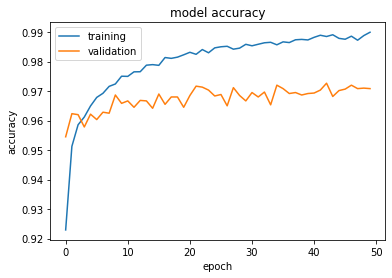

In [18]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment3.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment3_train.history['acc'])
plot.plot(expriment3_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

Expriement 4:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=64
```


```
c- optimization algorithm=SGD
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=100
```


```
f- batch size=32
```




```
g- activation function=Relu
```













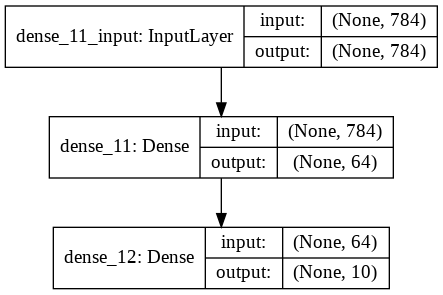

In [21]:
from keras.utils.vis_utils import plot_model
expriment4=build_model();
plot_model(expriment4, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [22]:
# train model
expriment4.compile(keras.optimizers.SGD(lr=0.01,momentum=0,decay=0,nesterov=False),loss='categorical_crossentropy', metrics=['accuracy'])
expriment4_train = expriment4.fit(
    x_train, y_train,
    batch_size=32, epochs=100,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 3s 61us/step - loss: 0.7241 - acc: 0.8153 - val_loss: 0.3351 - val_acc: 0.9120
Epoch 2/100
54000/54000 [==============================] - 3s 56us/step - loss: 0.3641 - acc: 0.8992 - val_loss: 0.2684 - val_acc: 0.9285
Epoch 3/100
54000/54000 [==============================] - 3s 55us/step - loss: 0.3134 - acc: 0.9107 - val_loss: 0.2404 - val_acc: 0.9358
Epoch 4/100
54000/54000 [==============================] - 3s 57us/step - loss: 0.2830 - acc: 0.9203 - val_loss: 0.2210 - val_acc: 0.9375
Epoch 5/100
54000/54000 [==============================] - 3s 55us/step - loss: 0.2603 - acc: 0.9264 - val_loss: 0.2064 - val_acc: 0.9435
Epoch 6/100
54000/54000 [==============================] - 3s 55us/step - loss: 0.2415 - acc: 0.9319 - val_loss: 0.1908 - val_acc: 0.9487
Epoch 7/100
54000/54000 [==============================] - 3s 55us/step - loss: 0.2257 - acc: 0.9367 - val_loss: 0.1811 - v

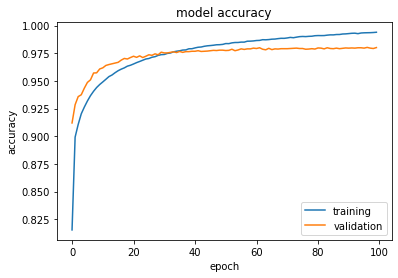

In [23]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment4.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment4_train.history['acc'])
plot.plot(expriment4_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

Expriement 5:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=64
```


```
c- optimization algorithm=rmsprop
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=100
```


```
f- batch size=32
```




```
g- activation function=Relu
```













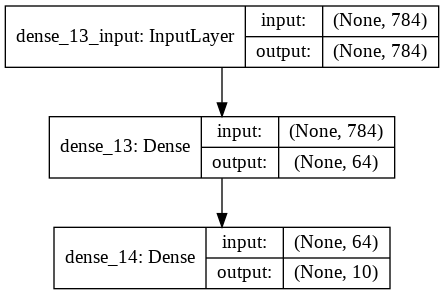

In [24]:
from keras.utils.vis_utils import plot_model
expriment5=build_model();
plot_model(expriment5, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [25]:
expriment5.compile(keras.optimizers.rmsprop(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
expriment5_train = expriment5.fit(
    x_train, y_train,
    batch_size=32, epochs=100,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 4s 68us/step - loss: 0.3259 - acc: 0.9157 - val_loss: 0.2289 - val_acc: 0.9475
Epoch 2/100
54000/54000 [==============================] - 3s 61us/step - loss: 0.2451 - acc: 0.9521 - val_loss: 0.2542 - val_acc: 0.9585
Epoch 3/100
54000/54000 [==============================] - 3s 59us/step - loss: 0.2466 - acc: 0.9595 - val_loss: 0.2209 - val_acc: 0.9687
Epoch 4/100
54000/54000 [==============================] - 3s 61us/step - loss: 0.2478 - acc: 0.9636 - val_loss: 0.2755 - val_acc: 0.9623
Epoch 5/100
54000/54000 [==============================] - 3s 61us/step - loss: 0.2342 - acc: 0.9686 - val_loss: 0.2965 - val_acc: 0.9660
Epoch 6/100
54000/54000 [==============================] - 3s 61us/step - loss: 0.2426 - acc: 0.9700 - val_loss: 0.2403 - val_acc: 0.9700
Epoch 7/100
54000/54000 [==============================] - 3s 63us/step - loss: 0.2286 - acc: 0.9715 - val_loss: 0.2629 - v

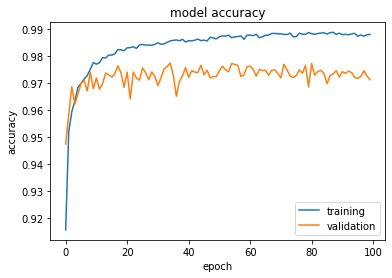

In [26]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment5.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment5_train.history['acc'])
plot.plot(expriment5_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

Expriement 6:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=64
```


```
c- optimization algorithm=adam
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=100
```


```
f- batch size=32
```




```
g- activation function=Relu
```













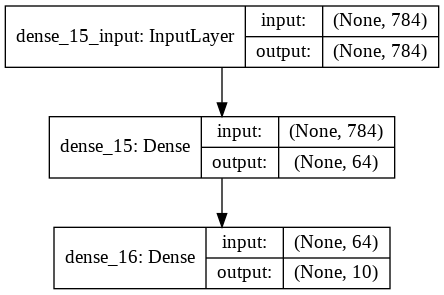

In [27]:
from keras.utils.vis_utils import plot_model
expriment6=build_model();
plot_model(expriment6, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [28]:
expriment6.compile(keras.optimizers.adam(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
expriment6_train = expriment6.fit(
    x_train, y_train,
    batch_size=32, epochs=100,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 4s 69us/step - loss: 0.2576 - acc: 0.9231 - val_loss: 0.1486 - val_acc: 0.9555
Epoch 2/100
54000/54000 [==============================] - 3s 62us/step - loss: 0.1705 - acc: 0.9506 - val_loss: 0.1426 - val_acc: 0.9638
Epoch 3/100
54000/54000 [==============================] - 3s 61us/step - loss: 0.1525 - acc: 0.9573 - val_loss: 0.1229 - val_acc: 0.9660
Epoch 4/100
54000/54000 [==============================] - 3s 62us/step - loss: 0.1427 - acc: 0.9612 - val_loss: 0.1417 - val_acc: 0.9593
Epoch 5/100
54000/54000 [==============================] - 3s 63us/step - loss: 0.1319 - acc: 0.9646 - val_loss: 0.1402 - val_acc: 0.9683
Epoch 6/100
54000/54000 [==============================] - 3s 63us/step - loss: 0.1261 - acc: 0.9666 - val_loss: 0.1713 - val_acc: 0.9603
Epoch 7/100
54000/54000 [==============================] - 3s 62us/step - loss: 0.1209 - acc: 0.9686 - val_loss: 0.1667 - v

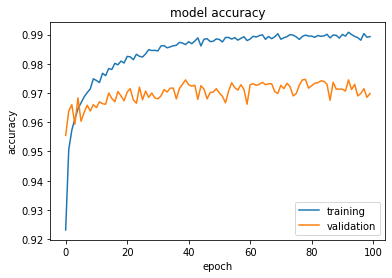

In [29]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment6.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment6_train.history['acc'])
plot.plot(expriment6_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

Expriement 7:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=400
```


```
c- optimization algorithm=SGD
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=50
```


```
f- batch size=32
```




```
g- activation function=Relu
```













In [0]:
def build_model(x):
  model =Sequential([
    layers.Dense(units=x,input_shape=(784,), activation=tf.nn.relu),
    layers.Dense(units=10, activation=tf.nn.softmax),
    
  ])
  return model

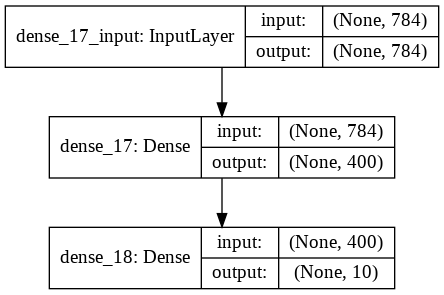

In [31]:
expriment7=build_model(400);
plot_model(expriment7, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [32]:
# train model
expriment7.compile(keras.optimizers.SGD(lr=0.01,momentum=0,decay=0,nesterov=False),loss='categorical_crossentropy', metrics=['accuracy'])
expriment7_train = expriment7.fit(
    x_train, y_train,
    batch_size=32, epochs=50,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 8s 152us/step - loss: 0.6391 - acc: 0.8454 - val_loss: 0.3141 - val_acc: 0.9157
Epoch 2/50
54000/54000 [==============================] - 8s 143us/step - loss: 0.3391 - acc: 0.9061 - val_loss: 0.2525 - val_acc: 0.9320
Epoch 3/50
54000/54000 [==============================] - 8s 143us/step - loss: 0.2888 - acc: 0.9189 - val_loss: 0.2215 - val_acc: 0.9402
Epoch 4/50
54000/54000 [==============================] - 8s 150us/step - loss: 0.2579 - acc: 0.9277 - val_loss: 0.2026 - val_acc: 0.9467
Epoch 5/50
54000/54000 [==============================] - 8s 143us/step - loss: 0.2347 - acc: 0.9346 - val_loss: 0.1834 - val_acc: 0.9522
Epoch 6/50
54000/54000 [==============================] - 8s 145us/step - loss: 0.2159 - acc: 0.9400 - val_loss: 0.1726 - val_acc: 0.9543
Epoch 7/50
54000/54000 [==============================] - 8s 142us/step - loss: 0.2004 - acc: 0.9445 - val_loss: 0.1615 - v

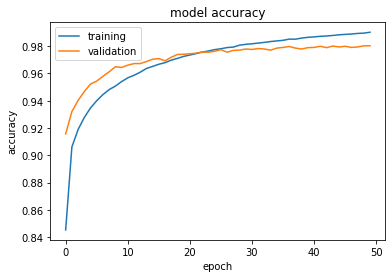

In [33]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment7.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment7_train.history['acc'])
plot.plot(expriment7_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

Expriement 8:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=400
```


```
c- optimization algorithm=SGD
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=50
```


```
f- batch size=32
```




```
g- activation function=Relu
```













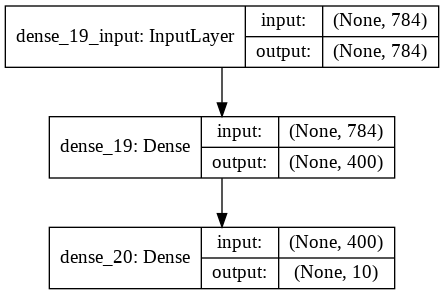

In [34]:
expriment8=build_model(400);
plot_model(expriment8, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [35]:
expriment8.compile(keras.optimizers.rmsprop(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
expriment8_train = expriment8.fit(
    x_train, y_train,
    batch_size=32, epochs=50,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 11s 202us/step - loss: 2.1687 - acc: 0.8188 - val_loss: 0.4430 - val_acc: 0.9502
Epoch 2/50
54000/54000 [==============================] - 10s 194us/step - loss: 0.4827 - acc: 0.9504 - val_loss: 0.3798 - val_acc: 0.9640
Epoch 3/50
54000/54000 [==============================] - 11s 206us/step - loss: 0.5066 - acc: 0.9567 - val_loss: 0.4025 - val_acc: 0.9682
Epoch 4/50
54000/54000 [==============================] - 10s 188us/step - loss: 0.4749 - acc: 0.9618 - val_loss: 0.4303 - val_acc: 0.9672
Epoch 5/50
54000/54000 [==============================] - 10s 188us/step - loss: 0.4524 - acc: 0.9643 - val_loss: 0.4387 - val_acc: 0.9672
Epoch 6/50
54000/54000 [==============================] - 10s 187us/step - loss: 0.4338 - acc: 0.9670 - val_loss: 0.4224 - val_acc: 0.9682
Epoch 7/50
54000/54000 [==============================] - 10s 190us/step - loss: 0.4384 - acc: 0.9675 - val_loss: 0.4

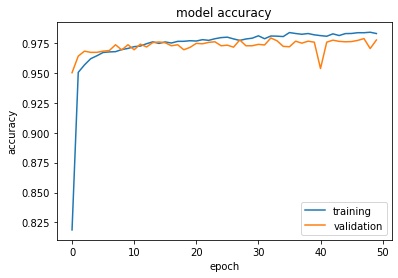

In [36]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment8.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment8_train.history['acc'])
plot.plot(expriment8_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

Expriement 9:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=400
```


```
c- optimization algorithm=adam
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=50
```


```
f- batch size=32
```




```
g- activation function=Relu
```













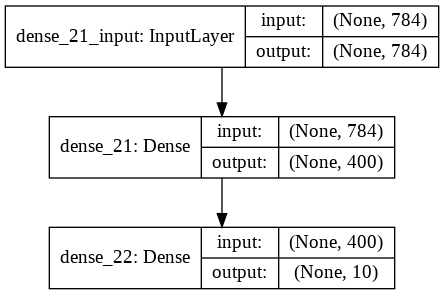

In [37]:
expriment9=build_model(400);
plot_model(expriment9, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [38]:
expriment9.compile(keras.optimizers.adam(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
expriment9_train = expriment9.fit(
    x_train, y_train,
    batch_size=32, epochs=50,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 12s 228us/step - loss: 0.2638 - acc: 0.9236 - val_loss: 0.2198 - val_acc: 0.9453
Epoch 2/50
54000/54000 [==============================] - 11s 210us/step - loss: 0.1786 - acc: 0.9526 - val_loss: 0.1709 - val_acc: 0.9562
Epoch 3/50
54000/54000 [==============================] - 12s 216us/step - loss: 0.1551 - acc: 0.9608 - val_loss: 0.1813 - val_acc: 0.9547
Epoch 4/50
54000/54000 [==============================] - 12s 219us/step - loss: 0.1405 - acc: 0.9654 - val_loss: 0.1440 - val_acc: 0.9680
Epoch 5/50
54000/54000 [==============================] - 11s 210us/step - loss: 0.1308 - acc: 0.9686 - val_loss: 0.1714 - val_acc: 0.9678
Epoch 6/50
54000/54000 [==============================] - 11s 212us/step - loss: 0.1283 - acc: 0.9710 - val_loss: 0.1902 - val_acc: 0.9613
Epoch 7/50
54000/54000 [==============================] - 11s 208us/step - loss: 0.1295 - acc: 0.9724 - val_loss: 0.1

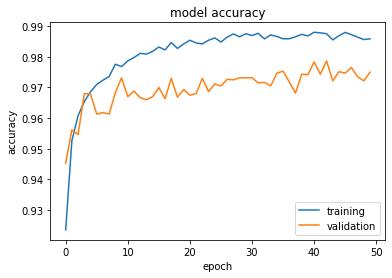

In [39]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment9.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment9_train.history['acc'])
plot.plot(expriment9_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

Expriement 10:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=400
```


```
c- optimization algorithm=SGD
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=100
```


```
f- batch size=32
```




```
g- activation function=Relu
```













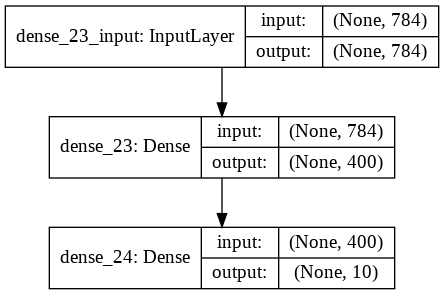

In [40]:
expriment10=build_model(400);
plot_model(expriment10, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [41]:
# train model
expriment10.compile(keras.optimizers.SGD(lr=0.01,momentum=0,decay=0,nesterov=False),loss='categorical_crossentropy', metrics=['accuracy'])
expriment10_train = expriment10.fit(
    x_train, y_train,
    batch_size=32, epochs=100,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 8s 157us/step - loss: 0.6577 - acc: 0.8392 - val_loss: 0.3140 - val_acc: 0.9192
Epoch 2/100
54000/54000 [==============================] - 8s 147us/step - loss: 0.3391 - acc: 0.9063 - val_loss: 0.2513 - val_acc: 0.9327
Epoch 3/100
54000/54000 [==============================] - 8s 152us/step - loss: 0.2878 - acc: 0.9199 - val_loss: 0.2205 - val_acc: 0.9407
Epoch 4/100
54000/54000 [==============================] - 8s 147us/step - loss: 0.2563 - acc: 0.9282 - val_loss: 0.2002 - val_acc: 0.9458
Epoch 5/100
54000/54000 [==============================] - 8s 144us/step - loss: 0.2335 - acc: 0.9347 - val_loss: 0.1844 - val_acc: 0.9505
Epoch 6/100
54000/54000 [==============================] - 8s 144us/step - loss: 0.2150 - acc: 0.9398 - val_loss: 0.1704 - val_acc: 0.9552
Epoch 7/100
54000/54000 [==============================] - 8s 145us/step - loss: 0.1993 - acc: 0.9444 - val_loss: 0.1

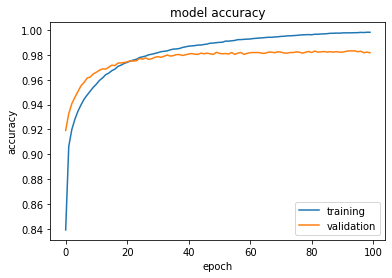

In [42]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment10.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment10_train.history['acc'])
plot.plot(expriment10_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

Expriement 11:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=400
```


```
c- optimization algorithm=rmsprop
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=100
```


```
f- batch size=32
```




```
g- activation function=Relu
```













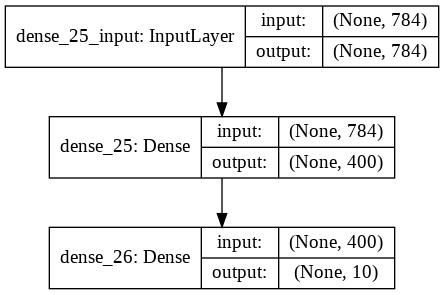

In [43]:
expriment11=build_model(400);
plot_model(expriment11, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [44]:
expriment11.compile(keras.optimizers.rmsprop(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
expriment11_train = expriment11.fit(
    x_train, y_train,
    batch_size=32, epochs=100,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 11s 202us/step - loss: 3.2926 - acc: 0.7528 - val_loss: 0.4855 - val_acc: 0.9447
Epoch 2/100
54000/54000 [==============================] - 10s 192us/step - loss: 0.5535 - acc: 0.9450 - val_loss: 0.4230 - val_acc: 0.9615
Epoch 3/100
54000/54000 [==============================] - 11s 195us/step - loss: 0.6246 - acc: 0.9500 - val_loss: 0.6569 - val_acc: 0.9530
Epoch 4/100
54000/54000 [==============================] - 11s 203us/step - loss: 0.6024 - acc: 0.9553 - val_loss: 0.4475 - val_acc: 0.9658
Epoch 5/100
54000/54000 [==============================] - 11s 202us/step - loss: 0.5541 - acc: 0.9591 - val_loss: 0.5497 - val_acc: 0.9617
Epoch 6/100
54000/54000 [==============================] - 10s 194us/step - loss: 0.5503 - acc: 0.9607 - val_loss: 0.5386 - val_acc: 0.9625
Epoch 7/100
54000/54000 [==============================] - 10s 194us/step - loss: 0.4979 - acc: 0.9644 - val_lo

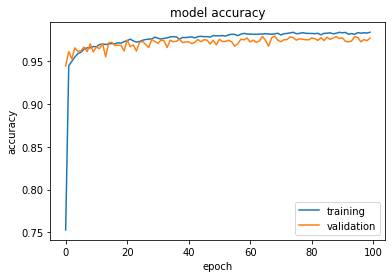

In [45]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment11.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment11_train.history['acc'])
plot.plot(expriment11_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

Expriement 12:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=400
```


```
c- optimization algorithm=adam
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=100
```


```
f- batch size=32
```




```
g- activation function=Relu
```













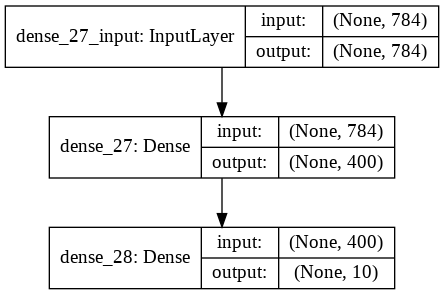

In [46]:
expriment12=build_model(400);
plot_model(expriment12, to_file='model_plot.png',expand_nested=True,show_shapes=True)

In [47]:
expriment12.compile(keras.optimizers.adam(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
expriment12_train = expriment12.fit(
    x_train, y_train,
    batch_size=32, epochs=100,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 12s 231us/step - loss: 0.2615 - acc: 0.9248 - val_loss: 0.1496 - val_acc: 0.9563
Epoch 2/100
54000/54000 [==============================] - 12s 221us/step - loss: 0.1741 - acc: 0.9535 - val_loss: 0.1569 - val_acc: 0.9597
Epoch 3/100
54000/54000 [==============================] - 12s 218us/step - loss: 0.1466 - acc: 0.9626 - val_loss: 0.1383 - val_acc: 0.9662
Epoch 4/100
54000/54000 [==============================] - 12s 215us/step - loss: 0.1370 - acc: 0.9661 - val_loss: 0.1759 - val_acc: 0.9590
Epoch 5/100
54000/54000 [==============================] - 12s 217us/step - loss: 0.1302 - acc: 0.9691 - val_loss: 0.1791 - val_acc: 0.9650
Epoch 6/100
54000/54000 [==============================] - 12s 215us/step - loss: 0.1227 - acc: 0.9716 - val_loss: 0.1805 - val_acc: 0.9652
Epoch 7/100
54000/54000 [==============================] - 12s 218us/step - loss: 0.1150 - acc: 0.9740 - val_lo

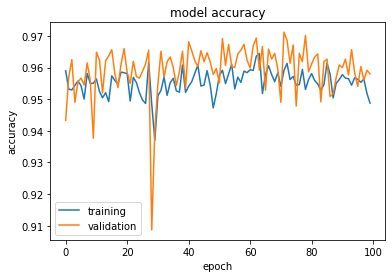

In [0]:
import matplotlib.pyplot as plot
loss, accuracy  = expriment12.evaluate(x_test, y_test, verbose=False)
plot.plot(expriment12_train.history['acc'])
plot.plot(expriment12_train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()

2.Set the best parameters from previous example and apply them for CIFAR10 dataset classification.

In [0]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(cx_train, cy_train), (cx_test, cy_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
cx_train = cx_train.reshape(cx_train.shape[0], 3072)#32*32*3
cx_test = cx_test.reshape(cx_test.shape[0], 3072)

In [0]:
cx_train = cx_train.astype('float32') / 255
cx_test = cx_test.astype('float32') / 255

In [0]:
cy_train = keras.utils.np_utils.to_categorical(cy_train, num_classes=10)
cy_test = keras.utils.np_utils.to_categorical(cy_test, num_classes=10)

In [0]:
model = Sequential()
model.add(Dense(400, activation='relu', input_dim=3072))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(keras.optimizers.adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(cx_train,cy_train, epochs=50, batch_size=32, verbose=2, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/50





 - 29s - loss: 14.4879 - acc: 0.1006 - val_loss: 14.5434 - val_acc: 0.0977
Epoch 2/50
 - 29s - loss: 14.4970 - acc: 0.1006 - val_loss: 14.5434 - val_acc: 0.0977
Epoch 3/50
 - 29s - loss: 14.4970 - acc: 0.1006 - val_loss: 14.5434 - val_acc: 0.0977
Epoch 4/50
 - 30s - loss: 14.4970 - acc: 0.1006 - val_loss: 14.5434 - val_acc: 0.0977
Epoch 5/50
 - 29s - loss: 14.4970 - acc: 0.1006 - val_loss: 14.5434 - val_acc: 0.0977
Epoch 6/50
 - 28s - loss: 14.4970 - acc: 0.1006 - val_loss: 14.5434 - val_acc: 0.0977
Epoch 7/50
 - 29s - loss: 14.4970 - acc: 0.1006 - val_loss: 14.5434 - val_acc: 0.0977
Epoch 8/50
 - 29s - loss: 14.4970 - acc: 0.1006 - val_loss: 14.5434 - val_acc: 0.0977
Epoch 9/50
 - 29s - loss: 14.4970 - acc: 0.1006 - val_loss: 14.5434 - val_acc: 0.0977
Epoch 10/50
 - 29s - loss: 14.4970 - acc: 0.1006 - val_loss: 14.5434 - val

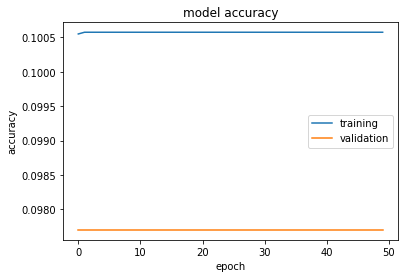

In [0]:
import matplotlib.pyplot as plot
loss, accuracy  = model.evaluate(cx_test, cy_test, verbose=False)
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()